# Classification of domino tiles CNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
import os
import shutil

# Define the source directory containing subfolders named by labels
source_directory = 'data/train'

# Define the destination directory where you want to merge all images
destination_directory = 'all'

# Iterate through each subfolder in the source directory
for label_folder in os.listdir(source_directory):
    # Get the full path of the label folder
    label_folder_path = os.path.join(source_directory, label_folder)
    
    # Check if the current item is a directory
    if os.path.isdir(label_folder_path):
        # Iterate through each file in the label folder
        for filename in os.listdir(label_folder_path):
            # Get the full path of the file
            file_path = os.path.join(label_folder_path, filename)
            
            # Check if the current item is a file
            if os.path.isfile(file_path):
                # Move the file to the destination directory
                shutil.copy(file_path, destination_directory)

print("All images have been moved to the destination directory.")


All images have been moved to the destination directory.


In [4]:
# Set variables
data_dir = "data"
batch_size = 64
img_size = (100, 100)
num_classes = 28

In [5]:
# Data augmentation
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = datagen.flow_from_directory(
    data_dir + '/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir + '/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
)

Found 2800 images belonging to 28 classes.
Found 2800 images belonging to 28 classes.


## Classification Model

In [5]:
# Model
model = Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# 4th Convolutional Layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# Flatten the data for upcoming dense layers
model.add(layers.Flatten())

# Fully Connected layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

# Output Layer
model.add(layers.Dense(num_classes, activation='softmax'))  # 28 Classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 47, 47, 64)      

In [10]:
# Train the model
epochs = 50
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/50
44/44 [==============================] - 4s 80ms/step - loss: 0.7245 - accuracy: 0.7504 - val_loss: 1.0645 - val_accuracy: 0.6304
Epoch 2/50
44/44 [==============================] - 4s 80ms/step - loss: 0.6645 - accuracy: 0.7675 - val_loss: 1.0446 - val_accuracy: 0.6279
Epoch 3/50
44/44 [==============================] - 4s 80ms/step - loss: 0.5906 - accuracy: 0.7946 - val_loss: 0.7496 - val_accuracy: 0.7457
Epoch 4/50
44/44 [==============================] - 3s 79ms/step - loss: 0.5404 - accuracy: 0.8168 - val_loss: 0.3063 - val_accuracy: 0.9021
Epoch 5/50
44/44 [==============================] - 3s 79ms/step - loss: 0.4850 - accuracy: 0.8354 - val_loss: 0.3123 - val_accuracy: 0.9114
Epoch 6/50
44/44 [==============================] - 3s 79ms/step - loss: 0.4262 - accuracy: 0.8507 - val_loss: 0.3042 - val_accuracy: 0.8989
Epoch 7/50
44/44 [==============================] - 3s 79ms/step - loss: 0.3784 - accuracy: 0.8725 - val_loss: 0.4440 - val_accuracy: 0.8471
Epoch 8/50
44

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

44/44 [==============================] - 2s 31ms/step - loss: 0.0313 - accuracy: 0.9907
Test accuracy: 0.9907143115997314


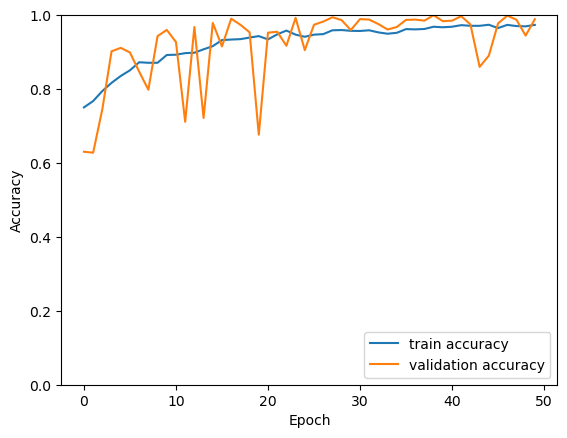

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

44/44 [==============================] - 2s 39ms/step


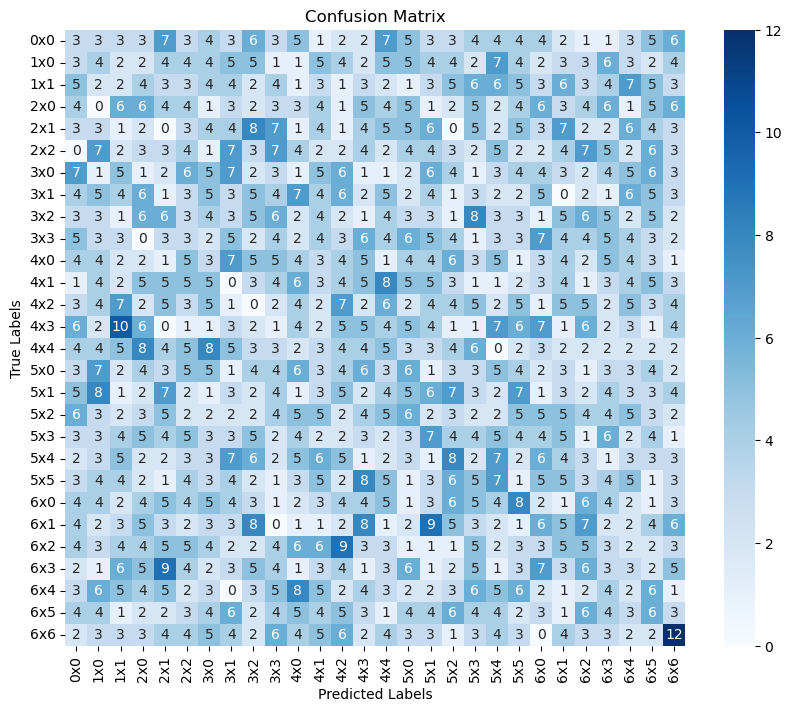

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the validation set
predictions = model.predict(validation_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the validation generator
true_labels = validation_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix[::-1], annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

2/2 [==============================] - 0s 205ms/step


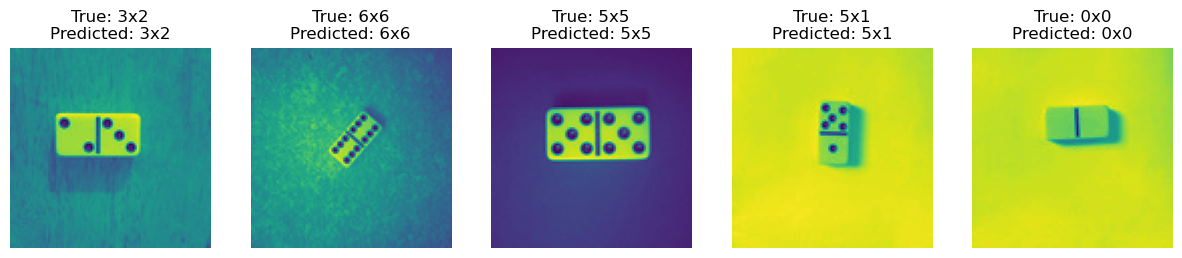

In [35]:
# Function to plot images with true labels and predictions
def plot_images_with_predictions(model, generator, num_images=5):
    # Retrieve a batch of images and labels from the generator
    images, true_labels = generator.next()

    # Make predictions on the batch
    predictions = model.predict(images)

    # Get class names from the generator
    class_names = list(generator.class_indices.keys())

    # Plot the images with true labels and predictions
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        true_label = class_names[np.argmax(true_labels[i])]
        predicted_label = class_names[np.argmax(predictions[i])]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.show()

# Use the function to visualize images with labels and predictions
plot_images_with_predictions(model, validation_generator, num_images=5)


In [25]:
# Save the model
model.save('model.h5')

## Multi-class Classification model (R-CNN)
Classification & Regression CNN model for domino tiles segmentation using R-CNN architecture. The model is trained to classify the domino tiles and to predict the bounding box coordinates of the domino tiles in the image.

<b>4 main steps:</b>
1. CNN layers to extract features.
2. RPN <i>(Region Proposal Network)</i> to identify possible object locations in an image based on the features extracted by the CNN layers.
3. Classification to predict the class.
4. Regression to fine-tune the bounding box coordinates.

## Soon to be implemented